### **Random Forest Classifier**

In [105]:
# Importing all the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [106]:
# Loading thh dataset and printing first 4-5 rows
df = pd.read_csv('data (2).csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**Data Preprocessing**
1. Drop irrelevant features

2. Check for missing values

3. Encodign the target columns, as it contains categorical data type.

In [107]:
# Dropping Irrelevant features, here it is 'unnamed: 32' and 'id'
df = df.drop(['Unnamed: 32', 'id'], axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [108]:
# Checking for missing values
df.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [109]:
# Encodign Target columns: categorical ('M' for malignant, 'B' for benign) to numeric (1 for malignant, 0 for benign)

df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [110]:
# Split features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

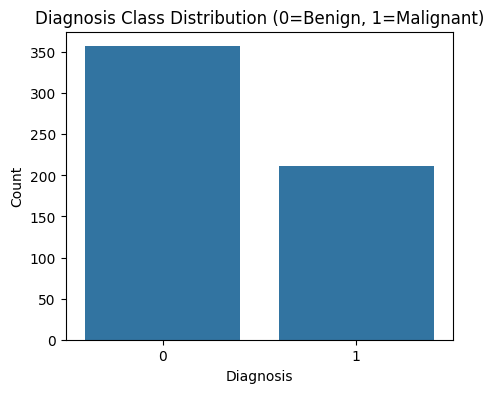

In [111]:
# Visualize class distribution
plt.figure(figsize=(5,4))
sns.countplot(x=y)
plt.title('Diagnosis Class Distribution (0=Benign, 1=Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

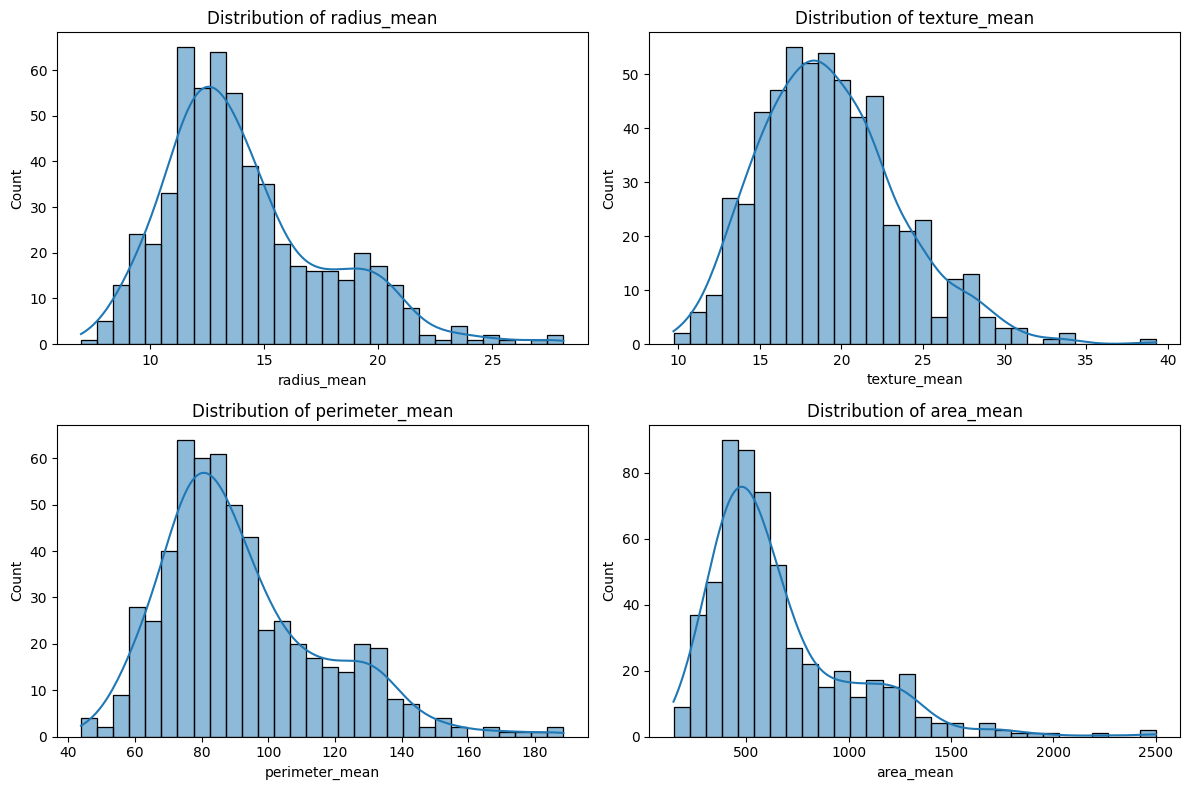

In [112]:
# Visualize feature distributions for first 4 features
features_to_plot = X.columns[:4]
plt.figure(figsize=(12,8))
for i, feature in enumerate(features_to_plot):
    plt.subplot(2,2,i+1)
    sns.histplot(X[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

In [113]:
# Train-test split
# SPlititng the data into training(80%) and testing(20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
# Output shapes and missing value info
X_train.shape, X_test.shape, y_train.shape, y_test.shape, df['diagnosis'].value_counts()

((455, 30),
 (114, 30),
 (455,),
 (114,),
 diagnosis
 0    357
 1    212
 Name: count, dtype: int64)

**Implementing Decision Tree Classifier**

1. Gini Impurity: measure how often a randomly chosen element from the set will be incorrectly labeled.

The result lies between 0 and 1.
0:Pure (all samples are of the same class)
1: Impure (maximum impurity)

2. Split Dataset: splititng the dataset based on features and threshold.

3. Best Spit: to find the best feature and threshold to split the dataset.
The aim is to Minimize the Gini Impurity.





In [126]:
# Decision tree classifier
class DecisionTree:
    # Initializing the decision tree with constraints for depth, splitting, and features.
    def __init__(self, max_depth=None, min_samples_split=2, max_features=None):
        self.max_depth = max_depth  # maximum depth of the tree
        self.min_samples_split = min_samples_split  # min sample required to split a node
        self.max_features = max_features   #no of features to consider at each split
        self.tree = None

# Helper functions for Decision Tree

# Gini Impurity for a set of labels of y
def gini(y):
    classes, counts = np.unique(y, return_counts=True)
    impurity = 1.0
    for count in counts:
        prob = count / len(y)
        impurity -= prob ** 2
    return impurity

# Spliting the dataset into left & right subsets
def split_dataset(X, y, feature, threshold):
    left_mask = X[:, feature] <= threshold
    right_mask = X[:, feature] > threshold
    return X[left_mask], y[left_mask], X[right_mask], y[right_mask]

# Finding the best split
def best_split(X, y, feature_indices):
    best_gini = 1.0
    best_feature = None
    best_threshold = None
    n_samples, n_features = X.shape
    for feature in feature_indices:
        thresholds = np.unique(X[:, feature])
        for threshold in thresholds:
            X_left, y_left, X_right, y_right = split_dataset(X, y, feature, threshold)
            if len(y_left) == 0 or len(y_right) == 0:
                continue
            gini_left = gini(y_left)
            gini_right = gini(y_right)
            weighted_gini = (len(y_left) * gini_left + len(y_right) * gini_right) / n_samples
            if weighted_gini < best_gini:
                best_gini = weighted_gini
                best_feature = feature
                best_threshold = threshold
    return best_feature, best_threshold

In [116]:
# TreeNode class : represents a single node in the decision tree
# Stores Gini Impurity, Smaple counts, Predicted class, Split info, Child nodes
class TreeNode:
    def __init__(self, gini, num_samples, num_samples_per_class, predicted_class):
        self.gini = gini
        self.num_samples = num_samples  # total number of sampels to reach the node
        self.num_samples_per_class = num_samples_per_class # array of the above nodes
        self.predicted_class = predicted_class  #
        self.feature_index = None    #index of the feature used to split the data
        self.threshold = None  # threshold value for the split
        self.left = None  # left child ndoe (initially NULL)
        self.right = None  # right child node (initially NULL)

# Building Decision tree recursively
def build_tree(X, y, depth=0, max_depth=None, min_samples_split=2, feature_indices=None):
    num_samples_per_class = [np.sum(y == i) for i in np.unique(y)]
    predicted_class = np.argmax(num_samples_per_class)
    node = TreeNode(          # Creating a TreeNode fo rthis node
        gini=gini(y),
        num_samples=len(y),
        num_samples_per_class=num_samples_per_class,
        predicted_class=predicted_class
    )
    if max_depth is not None and depth >= max_depth:  # stopping criteria (i.e. when to make it a leaf node)
        return node
    if len(np.unique(y)) == 1:
        return node
    if len(y) < min_samples_split:
        return node
    feature, threshold = best_split(X, y, feature_indices) # finding the best split
    if feature is None:
        return node
    # Settign split info and recursively building child nodes
    node.feature_index = feature
    node.threshold = threshold
    X_left, y_left, X_right, y_right = split_dataset(X, y, feature, threshold)
    node.left = build_tree(X_left, y_left, depth+1, max_depth, min_samples_split, feature_indices)
    node.right = build_tree(X_right, y_right, depth+1, max_depth, min_samples_split, feature_indices)
    return node




In [127]:
# Prediction for a single sample using trained decision tree
# the function traverses a Decision Tree from the root to leaf node for a given input sample x, and returns the predicted class stored at the leaf
def predict_tree(node, x):
    while node.left:
        if x[node.feature_index] <= node.threshold:
            node = node.left
        else:
            node = node.right
    return node.predicted_class

**Random Tree Classifier**

In [129]:
# Random Forest Classifier
# The RandomForest class builds an ensemble of decision trees, each trained on a random subset of the data and features.
class RandomForest:
    def __init__(self, n_trees=10, max_depth=None, min_samples_split=2, max_features='sqrt'):
        self.n_trees = n_trees  # number of trees in the forest
        self.max_depth = max_depth  # maximum depth of each tree
        self.min_samples_split = min_samples_split  # minimum samples required to split a node
        self.max_features = max_features # maximum number of features to consider for each split
        self.trees = []  # List to store the trained trees and their feature indices.

    # Determines which features to use for each tree
    def _get_feature_indices(self, n_features):
        if self.max_features == 'sqrt':    # square root of the total number of features
            size = int(np.sqrt(n_features))
        elif self.max_features == 'log2':  # log base 2 of the number of features
            size = int(np.log2(n_features))
        elif isinstance(self.max_features, int):
            size = self.max_features
        else:
            size = n_features
        return random.sample(range(n_features), size)

    # # Training the Random Forest by building each tree on a bootstrap sample and a random subset of features.
    def fit(self, X, y):
        self.trees = []
        n_samples, n_features = X.shape
        for _ in range(self.n_trees):
            indices = np.random.choice(n_samples, n_samples, replace=True)
            X_sample = X[indices]
            y_sample = y[indices]
            feature_indices = self._get_feature_indices(n_features)
            # Build tree on the selected features only
            tree = build_tree(X_sample[:, feature_indices], y_sample, max_depth=self.max_depth, min_samples_split=self.min_samples_split, feature_indices=range(len(feature_indices)))
            self.trees.append((tree, feature_indices))
    # # Predict the class for each sample by aggregating predictions from all trees (majority vote)
    def predict(self, X):
        tree_preds = []
        for x in X:
            preds = []
            for tree, feature_indices in self.trees:
                x_sub = x[feature_indices]
                preds.append(predict_tree(tree, x_sub))
            tree_preds.append(preds)
        y_pred = [np.bincount(tree_pred).argmax() for tree_pred in tree_preds]
        return np.array(y_pred)

In [119]:
# Prepare data as numpy arrays
X_train_np = X_train.values
y_train_np = y_train.values
X_test_np = X_test.values
y_test_np = y_test.values

# Train the Random Forest
rf = RandomForest(n_trees=10, max_depth=10, min_samples_split=5, max_features='sqrt')
rf.fit(X_train_np, y_train_np)

# Predict on test set
y_pred = rf.predict(X_test_np)

# Evaluate accuracy
accuracy = np.mean(y_pred == y_test_np)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.62


**Confusion Matrix**
It shows the counts of true positives, true negatives, false positives and false negatives.



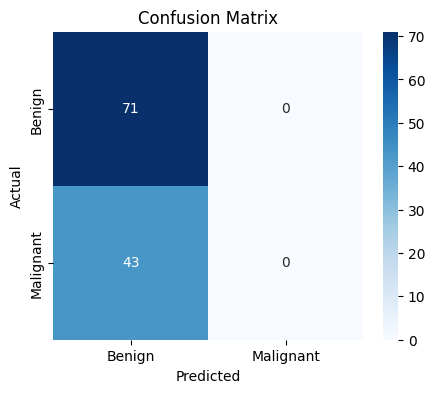

In [120]:
# Plotting the confusion matrix as a heatmap to visualize the classifier's performance on the test set.
cm = confusion_matrix(y_test_np, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Observation:

True Positives: 0 samples that are actually Malignant were correctly predicted as Malignant.

False Positives: 0 samples that are actually Benign were incorrectly predicted as Malignant.

True Negatives: 71 samples that are actually Benign were correctly predicted as Benign.

False Negatives: 43 samples that are actually Malignant were incorrectly predicted as Benign.

** Feature Importance**

Determined how important each feature in the Random Forest bu counting how often each feature is used to split nodes in the Decision trees.

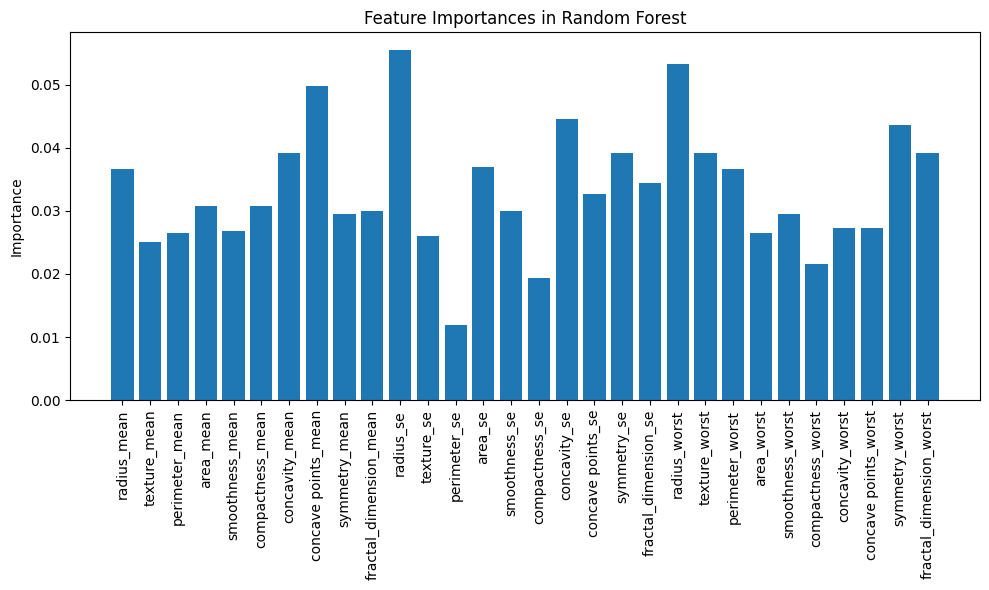

In [130]:
# Feature Importance
feature_counts = np.zeros(X_train.shape[1])  # initializing the array, to count the no of times each feature sued for splitting

#A recursive function that traverses a tree
def count_features(node, feature_indices):
    if node.left is not None and node.right is not None:
        feature_counts[feature_indices[node.feature_index]] += 1
        # Recursively calling for left and right child nodes.
        count_features(node.left, feature_indices)
        count_features(node.right, feature_indices)
# Iterates over all trees in the forest
for tree, feature_indices in rf.trees:
    count_features(tree, feature_indices)

# Normalize to get importance
feature_importance = feature_counts / feature_counts.sum()

# Plot
plt.figure(figsize=(10,6))
plt.bar(X_train.columns, feature_importance)
plt.xticks(rotation=90)
plt.title('Feature Importances in Random Forest')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

Observation:

1. **radius_se, radius_worst, and concave points_se**, hav the tallest bars, meaning they are frequentl used  in the model's splits.

2. **perimeter_se, smoothness_worst, and area_worst**, has the eshortest bars, meaning, model relies on them less.


**Model Evaluation**

In [123]:
# Trained the Random Forest on the training data and evaluate its accuracy on the test set.
rf = RandomForest(
    n_trees=100,         # 100 trees is a good default
    max_depth=10,        # Trees up to depth 10 (or try None for unlimited)
    min_samples_split=2, # Allow splits down to 2 samples
    max_features='sqrt'  # Standard for classification
)
rf.fit(X_train_np, y_train_np)
y_pred = rf.predict(X_test_np)
accuracy = np.mean(y_pred == y_test_np)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.62
